# <font  color=blue>Análise de Sentimento no Twitter</font>

Esse projeto consiste na Análise de sentimentos de tweets coletados através da API do Twitter sobre X. O projeto consiste em:
* Coleta de tweets.
* Identificação de tweets mais curtidos e retweetados.
* Identificação da fonte dos tweets. 
* Análise de sentimentos. 
* Mapa de calor dos tweets utilizando a localização declarada pelos usuários.


##### <font color=red>Instalação dos pacotes</font>

* **Geopy:** Usada para definir a geolocalização<br>
*!pip install geopy*
* **folium**
*!pip install folium*

* **pandas**<br>
*!pip install pandas*

### <font color=blue>Importação de pacotes</font>

In [1]:
# Pacotes básico
import tweepy #Acessa API do Twitter
import pandas as pd     
import numpy as np 
from textblob import TextBlob as tb
import time
import re

# Pacotes para visualização 
import matplotlib.pyplot as plt

#MAPA
from geopy.geocoders import Nominatim
import folium
from folium import plugins

### <font color=blue>Definição das credenciais de acesso (autenticação) na API do Twitter</font>

In [2]:
# Credenciais para utilização da API do Twitter

consumer_key = 'vAfg4JGHseCbB3XSjC6WRrKNxr'
consumer_secret = '1v13PEqKbVriJgpVlSQxDAWigLcVU7dkRSMFdJ5n25UVuklBYy9'

access_token = '61488529-2Iva8ZHkCQLrnXxqmuAYE1yubDjGJZxqpTaiUUh1zW'
access_token_secret = 'xYigRVN7kddVKGdkx4JTTOh8fLgPyIB6Sjlk32GEmMMNwP'

### <font color=blue>Autenticação na API do Twitter</font>

In [3]:
#Realizar autenticação no Twitter

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,retry_count=20,retry_delay=1)

**onde:**
* retry_count - número padrão de tentativas para tentar quando ocorrer um erro
* retry_delay - número de segundos para aguardar entre tentativas
* wait_on_rate_limit - se deve ou não esperar automaticamente a reposição dos limites de taxa
* wait_on_rate_limit_notify - Imprima ou não uma notificação quando o Tweepy estiver aguardando a reposição dos limites de taxa

### <font color=blue>Coleta de dados (busca por palavra chave)</font>

In [41]:
# Definir listas de armazenamento
tweets = []
info = []

#Definir que palavra deseja pesquisar no Twitter
#keyword = ('home office  OR  trabalho remoto  OR  trabalho em casa OR homeoffice OR  trabalhoremoto OR trabalhoemcasa')
keyword = ("olympics")


**OBSERVAÇÃO:**
A documentação completa do pacote *tweepy* está disponível no link abaixo:
* http://docs.tweepy.org/en/v3.5.0/api.html

Para realizar a busca por palavra chave vamos utilizar a função abaixo:<br>
* <font color=green>API.search(q[, lang][, locale][, rpp][, page][, since_id][, geocode][, show_user])</font><br><br>
**onde os principais parâmetros que serão usados são:**

* <font color=blue>q</font> - a string de consulta de pesquisa
* <font color=blue>lang</font> - Restringe os tweets para o idioma especificado, fornecido por um código ISO 639-1.
* <font color=blue>rpp</font> - O número de tweets a serem retornados por página, até no máximo 100.
* <font color=blue>page</font> - O número da página (começando em 1) a ser retornado, até um máximo de aproximadamente 1500 resultados (com base na página rpp).
* <font color=blue>since_id</font>  - Retorna apenas status com um ID maior que (ou seja, mais recente que) o ID especificado.
* <font color=blue>geocode</font>  - Retorna tweets de usuários localizados em um determinado raio da latitude / longitude especificada.
* <font color=blue>show_user</font>  - Quando verdadeiro, precede "<user>:" no início do tweet. O padrão é falso.



In [42]:
from googletrans import Translator
from unidecode import unidecode
analyses = None
tweets_score = []
polarities = []
tweets = []
#mixed, recent, popular

#tweets = token.search(q=keyword, count=10, result_type='mixed')
#tweets = token.search(q=keyword, count = 1000,rpp=10 ,result_type='mixed', tweet_mode='extended')
info = []
newtweet = None
for tweet in tweepy.Cursor(api.search,
                          q=keyword,rpp=100, result_type='mixed', \
                           tweet_mode='extended',\
                           include_entities=True, lang = 'en'). items(100):
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text
    
    newtweet = aux.replace("\n","")
    
    tweets.append(newtweet)
    info.append(tweet)
    analyses = tb(tweet.full_text)
    '''
    if analyses.detect_language()!= 'en':
        traducao = tb(str(analyses.translate(to='pt')))
        #print ('Texto traduzido: %s' % traducao)
        polarity = traducao.sentiment.polarity
        polarities.append(polarity)
    else:
    '''  
    polarity = analyses.sentiment.polarity
    polarities.append(polarity)
    
    file = open('tweets_keyord_aula.txt', 'a', -1, 'utf-8')
    file.write(newtweet+'\n')
    file.close()
    time.sleep(0.5)

In [43]:
print(polarities)

[0.38, 0.05, 0.25, 0.1125, 0.6, 0.25, -0.1, 0.0, 0.0, 0.0, -0.2, 0.0, 0.3666666666666667, 0.5, -0.6, 0.0, -0.125, 0.1, 0.0, 0.0, 0.32499999999999996, -0.275, 0.0, 0.0, 0.3, 0.0, 0.0, 0.3, 0.0, 0.125, -0.04999999999999999, 1.0, 0.0, 0.0, 0.5, 0.4666666666666666, 0.25, 0.18333333333333335, 0.8, 0.5, 0.3571428571428571, 0.5, 0.0, 0.4, 0.0, 0.0, 0.0, 0.1375, 0.35000000000000003, 0.0, 0.3, 0.0, 0.025, 0.375, 0.0, 0.24722222222222223, 0.3, 0.3, 0.3166666666666667, 0.0, 0.2619047619047619, 0.08333333333333333, 0.1375, 0.8, 0.0, 0.0, 0.43333333333333335, 0.0, 0.3, 0.8, 0.0, 0.7, 0.0, 0.3, 0.8, 0.0, 0.0, 0.1, 0.0, -0.1, 0.35, 0.8, 0.6625000000000001, 0.8, 0.0, -0.5, 0.0, 0.4, 0.05, 0.35000000000000003, 0.2619047619047619, 0.0, 0.5277777777777778, 0.8, 0.0, 0.18333333333333335, 0.8, 0.0, -1.0, 0.25]


##  <font color=blue>Buscar por palavra chave e recuperar os tweets em inglês</font>

In [44]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(info)))

Total de tweets coletados 100.


### <font color=blue>Criar dataframe</font>

In [45]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])         
tweets_df['Place']    = np.array([tweet.place for tweet in info])

tweets_df.to_csv("tweets_Keyword_covid_100.csv")

In [46]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,A historical win!Greysia Polii and Apriyani Ra...,203,1422074907811323905,Olympics,Olympics,,None,2021-08-02 06:00:53,Twitter Media Studio,120779,85585,None,None,None
1,Fave moment of the Olympics so far. Barshim (Q...,304,1421847918110248967,afidelf,Andrew Fidel Fernando,Sri Lanka,None,2021-08-01 14:58:54,Twitter Web App,57699,18782,None,None,None
2,Luar biasa‼️We salute 🇮🇩 Indonesia’s first eve...,149,1422074741762891776,bwfmedia,BWF,"Kuala Lumpur, Malaysia",None,2021-08-02 06:00:13,Twitter Web App,30749,18998,None,None,None


### Identificar Top Tweets coletados

In [47]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes']) #Função max do numpy identifica o valor máximo

likes = tweets_df[tweets_df.Likes == likes_max].index[0] #pega o primeiro tweet com valor máximo de curtidas

print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))


O tweet com mais curtidas (likes) é: 
A historical win!Greysia Polii and Apriyani Rahayu secure #INA's first ever #Badminton women's doubles Olympic gold - and the nation's first of #Tokyo2020.@bwfmedia @nocindonesia1 https://t.co/F0HDisviLI
Número de curtidas: 120779


In [48]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta quantos tweets possuem o mesmo valor máximo de curtidas

1


In [49]:
retweet_max  = np.max(tweets_df['Retweets']) #retorna o valor máximo

retweet  = tweets_df[tweets_df.Retweets == retweet_max].index[0] #pega o primeiro tweet com valor máximo de Retweets

print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
A historical win!Greysia Polii and Apriyani Rahayu secure #INA's first ever #Badminton women's doubles Olympic gold - and the nation's first of #Tokyo2020.@bwfmedia @nocindonesia1 https://t.co/F0HDisviLI
Número de retweets: 85585


In [21]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta quantos tweets possuem o mesmo valor máximo de Retweets

1


### Identifica a fonte(origem) do tweet

A fonte neste caso é o app ou dispositivo onde o usuário postou o tweet

In [64]:
sources = [] #lista para armazenar a fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) #inclui no vetor sources apenas se a fonte encontrada ainda não foi incluída

percent = np.zeros(len(sources)) #Retorna um novo vetor, com o número de elementos do vetor sources, preenchido com zeros a new array filled with zeros, for

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

##### Gráfico que exibe o número de tweets por fonte

In [65]:
sourceDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sourceDF

,source
Twitter Media Studio,1.0
Twitter Web App,20.0
Twitter for Android,43.0
Twitter for iPhone,33.0
Twitter for iPad,2.0
IFTTT,1.0


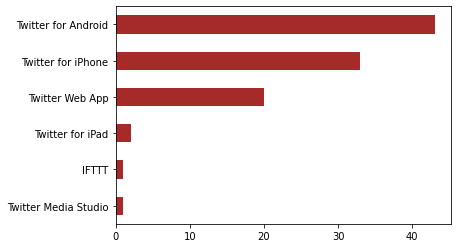

In [66]:
sources_sorted = sourceDF.sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#A52A2A')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## <font color=red>Análise de polaridade:</font>

In [50]:
#Variável que irá armazenar as polaridades
analysis = None

In [51]:
# Lista vazia para armazenar as polaridades
polarities = []

In [52]:
tweets_df.head(1)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,A historical win!Greysia Polii and Apriyani Ra...,203,1422074907811323905,Olympics,Olympics,,None,2021-08-02 06:00:53,Twitter Media Studio,120779,85585,None,None,None


##### Calcula polaridade (sentiment.polarity)

In [53]:
for tweet in tweets_df['Tweets']: #para cada tweet    
    analysis = tb(tweet)   
    
    polarity = analysis.sentiment.polarity #analisa a polaridade

    polarities.append(polarity)

In [54]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.225, 0.05, 0.25, 0.2333333333333333, 0.1375, 0.25, -0.1, 0.0, 0.0, 0.0, -0.2, 0.45, 0.3666666666666667, 0.5, -0.6, 0.0, -0.125, 0.1, 0.0, 0.0, 0.32499999999999996, -0.275, 0.0, 0.0, 0.3, 0.0, 0.0, 0.3, 0.0, 0.08333333333333333, 0.3041666666666667, 1.0, 0.0, 0.0, 0.5, 0.35, 0.525, 0.18333333333333335, 0.8, 0.3, 0.3571428571428571, 0.5, 0.0, 0.4, 0.0, 0.3, 0.16, 0.1375, 0.35000000000000003, 0.0, 0.3438095238095238, 0.06666666666666667, 0.2833333333333334, 0.3, 0.4166666666666667, 0.24722222222222223, 0.24, 0.3438095238095238, 0.3166666666666667, 0.0, 0.2619047619047619, 0.08333333333333333, 0.18142857142857144, 0.8, 0.0, 0.0, 0.403125, 0.0, 0.3, 0.8, -0.175, 0.7, 0.0, 0.15, 0.43333333333333335, 0.0, 0.0, 0.1, 0.0, -0.1, 0.35, 0.8, 0.7300000000000001, 0.8, 0.0, 0.16666666666666666, 0.0, 0.4, 0.05, 0.37, 0.2619047619047619, 0.0, 0.38148148148148153, 0.8, -0.11388888888888889, 0.18333333333333335, 0.8, 0.0, -1.0, 0.5958333333333333]


## <font color=red>Análise de Sentimentos:</font>

In [55]:
print('Para a(s) palavra(s):"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a(s) palavra(s):"olympics"
A MÉDIA DE SENTIMENTO É: 0.20509606481481485


In [56]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1                           

In [57]:
print("Tweets Positivos: %s" % positive)
print("Tweets Negativos: %s" % negative)
print("Tweets Neutros: %s" % neutral)

Tweets Positivos: 63
Tweets Negativos: 9
Tweets Neutros: 28


In [58]:
#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [59]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

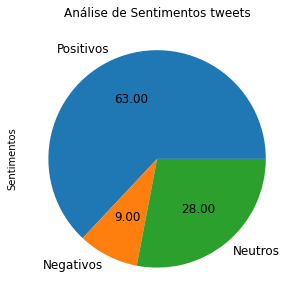

In [60]:
pie_chart = pd.Series(percents, index=sentiments,name='Sentimentos')
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5),title="Análise de Sentimentos tweets");

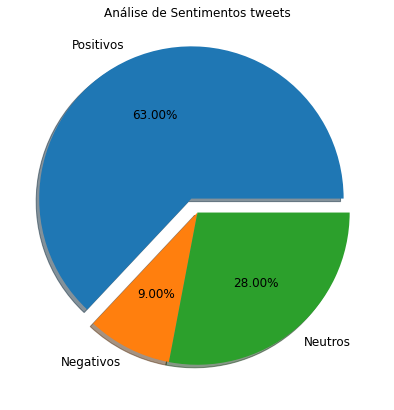

In [61]:
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',        shadow=True, startangle=90)
explode = (0.1, 0, 0) #Separa o primeiro

pie_chart = pd.Series(percents, index=sentiments,name='')
pie_chart.plot.pie(fontsize=12, explode=explode, autopct='%.2f%%', shadow=True, figsize=(7, 7),title="Análise de Sentimentos tweets");

**Dica:**
Veja a documentação do pacote *Matplotlib* no link:
* https://matplotlib.org/3.1.1/contents.html#

### <font color=blue>Mapa de calor dos tweets</font>

In [62]:
geolocator = Nominatim(user_agent="TweeterSentiments")

latitude = []
longitude = []

for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

**Dica:** Veja a documentação da função *Nominatim* no link:

* https://geopy.readthedocs.io/en/stable/#nominatim

In [63]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('covid.html')
mapa

**Dica:** Para conhecer o pacote Folium veja os links:
* https://python-visualization.github.io/folium/
* https://medium.com/@datalivre/folium-d6036a9ad29c